## 1- import and reading data

In [1]:
import sys

sys.path.append('../../../scripts/utilities')
from helper_functions import *

sys.path.append('../../../scripts/data_preprocessing')
from data_reduction import *

In [2]:
base_path = '../../../data/processed_data/'
df1 = read_files('df_filling_missing_values_with_median_encoded_handle_noisy_normalized.csv', base_path=base_path)[0]

## 2- calculate correlation matrix

In [3]:
correlation_matrix = calculate_correlation_matrix(df1,method='pearson')
correlation_matrix

SEQN  RIDSTATR  RIAGENDR  RIDAGEYR  RIDRETH1  RIDRETH3  \
SEQN      1.000000  0.000993 -0.005641  0.009519  0.015414  0.015820   
RIDSTATR  0.000993  1.000000 -0.006361  0.032990 -0.033489 -0.028967   
RIAGENDR -0.005641 -0.006361  1.000000  0.028616 -0.014514 -0.010508   
RIDAGEYR  0.009519  0.032990  0.028616  1.000000  0.031248  0.062385   
RIDRETH1  0.015414 -0.033489 -0.014514  0.031248  1.000000  0.922144   
...            ...       ...       ...       ...       ...       ...   
URDFLOW1 -0.005043  0.043517 -0.062915  0.091868  0.016135  0.028683   
LBDB12    0.006419  0.022723  0.048738  0.123016 -0.004058  0.005954   
LBDB12SI  0.006220  0.023006  0.049583  0.124062 -0.003955  0.006204   
MCQ160L   0.012585  0.022355  0.030008  0.771631  0.047706  0.075276   
MCQ220    0.013427  0.025193  0.025191  0.749830  0.049357  0.079944   

          RIDEXMON  DMQMILIZ  DMDBORN4  DMDCITZN  ...    LBXBSE  LBDBSESI  \
SEQN     -0.007832 -0.000779  0.022537  0.013820  ... -0.014250 -0.014199   
RIDSTATR -0.182328  0.001609  0.016151  0.019358  ...  0.011082  0.010494   
RIAGENDR  0.014785  0.209048  0.015691  0.004174  ... -0.008348 -0.008264   
RIDAGEYR  0.009536 -0.287978  0.247125  0.086767  ...  0.227713  0.227981   
RIDRETH1 -0.009474 -0.025650  0.006512 -0.069923  ...  0.031222  0.031359   
...            ...       ...       ...       ...  ...       ...       ...   
URDFLOW1  0.006601 -0.029513  0.052366  0.017070  ...  0.062731  0.062848   
LBDB12    0.007303 -0.014494  0.077625  0.034834  ...  0.030463  0.030349   
LBDB12SI  0.008286 -0.014746  0.077965  0.035576  ...  0.030478  0.030364   
MCQ160L   0.008230 -0.194356  0.275098  0.143127  ...  0.244324  0.244609   
MCQ220    0.000566 -0.172956  0.300500  0.160495  ...  0.251957  0.252266   

            LBXBMN  LBDBMNSI   URXVOL1  URDFLOW1    LBDB12  LBDB12SI  \
SEQN     -0.005879 -0.005320 -0.003473 -0.005043  0.006419  0.006220   
RIDSTATR  0.022795  0.022642  0.048256  0.043517  0.022723  0.023006   
RIAGENDR  0.124506  0.124509 -0.120447 -0.062915  0.048738  0.049583   
RIDAGEYR -0.109214 -0.108711  0.025224  0.091868  0.123016  0.124062   
RIDRETH1 -0.059428 -0.059563 -0.019446  0.016135 -0.004058 -0.003955   
...            ...       ...       ...       ...       ...       ...   
URDFLOW1 -0.039026 -0.039025  0.526406  1.000000  0.012996  0.013968   
LBDB12   -0.017225 -0.017086 -0.012684  0.012996  1.000000  0.998738   
LBDB12SI -0.016348 -0.016208 -0.011557  0.013968  0.998738  1.000000   
MCQ160L  -0.103366 -0.102860  0.061737  0.120647  0.095206  0.096464   
MCQ220   -0.098959 -0.098462  0.071394  0.128665  0.094655  0.095940   

           MCQ160L    MCQ220  
SEQN      0.012585  0.013427  
RIDSTATR  0.022355  0.025193  
RIAGENDR  0.030008  0.025191  
RIDAGEYR  0.771631  0.749830  
RIDRETH1  0.047706  0.049357  
...            ...       ...  
URDFLOW1  0.120647  0.128665  
LBDB12    0.095206  0.094655  
LBDB12SI  0.096464  0.095940  
MCQ160L   1.000000  0.941935  
MCQ220    0.941935  1.000000  

[372 rows x 372 columns]

## 3- use the Heat Map display method to show the correlation

In [4]:
top_correlations = get_top_correlations(correlation_matrix,n=100)
print(top_correlations)

URXUMS     URXUMA       1.000000
WTSH2YR.y  WTSH2YR.x    1.000000
LBDSALSI   LBXSAL       1.000000
LBDSGBSI   LBXSGB       1.000000
LBDSTBSI   LBXSTB       1.000000
                          ...   
DR1TPHOS   DR1TPROT     0.888447
OHX11CTC   OHX06CTC     0.886866
OHX09CTC   OHX08CTC     0.885747
DR1TSELE   DR1TPROT     0.884052
OHX09TC    OHX08TC      0.883403
Length: 100, dtype: float64


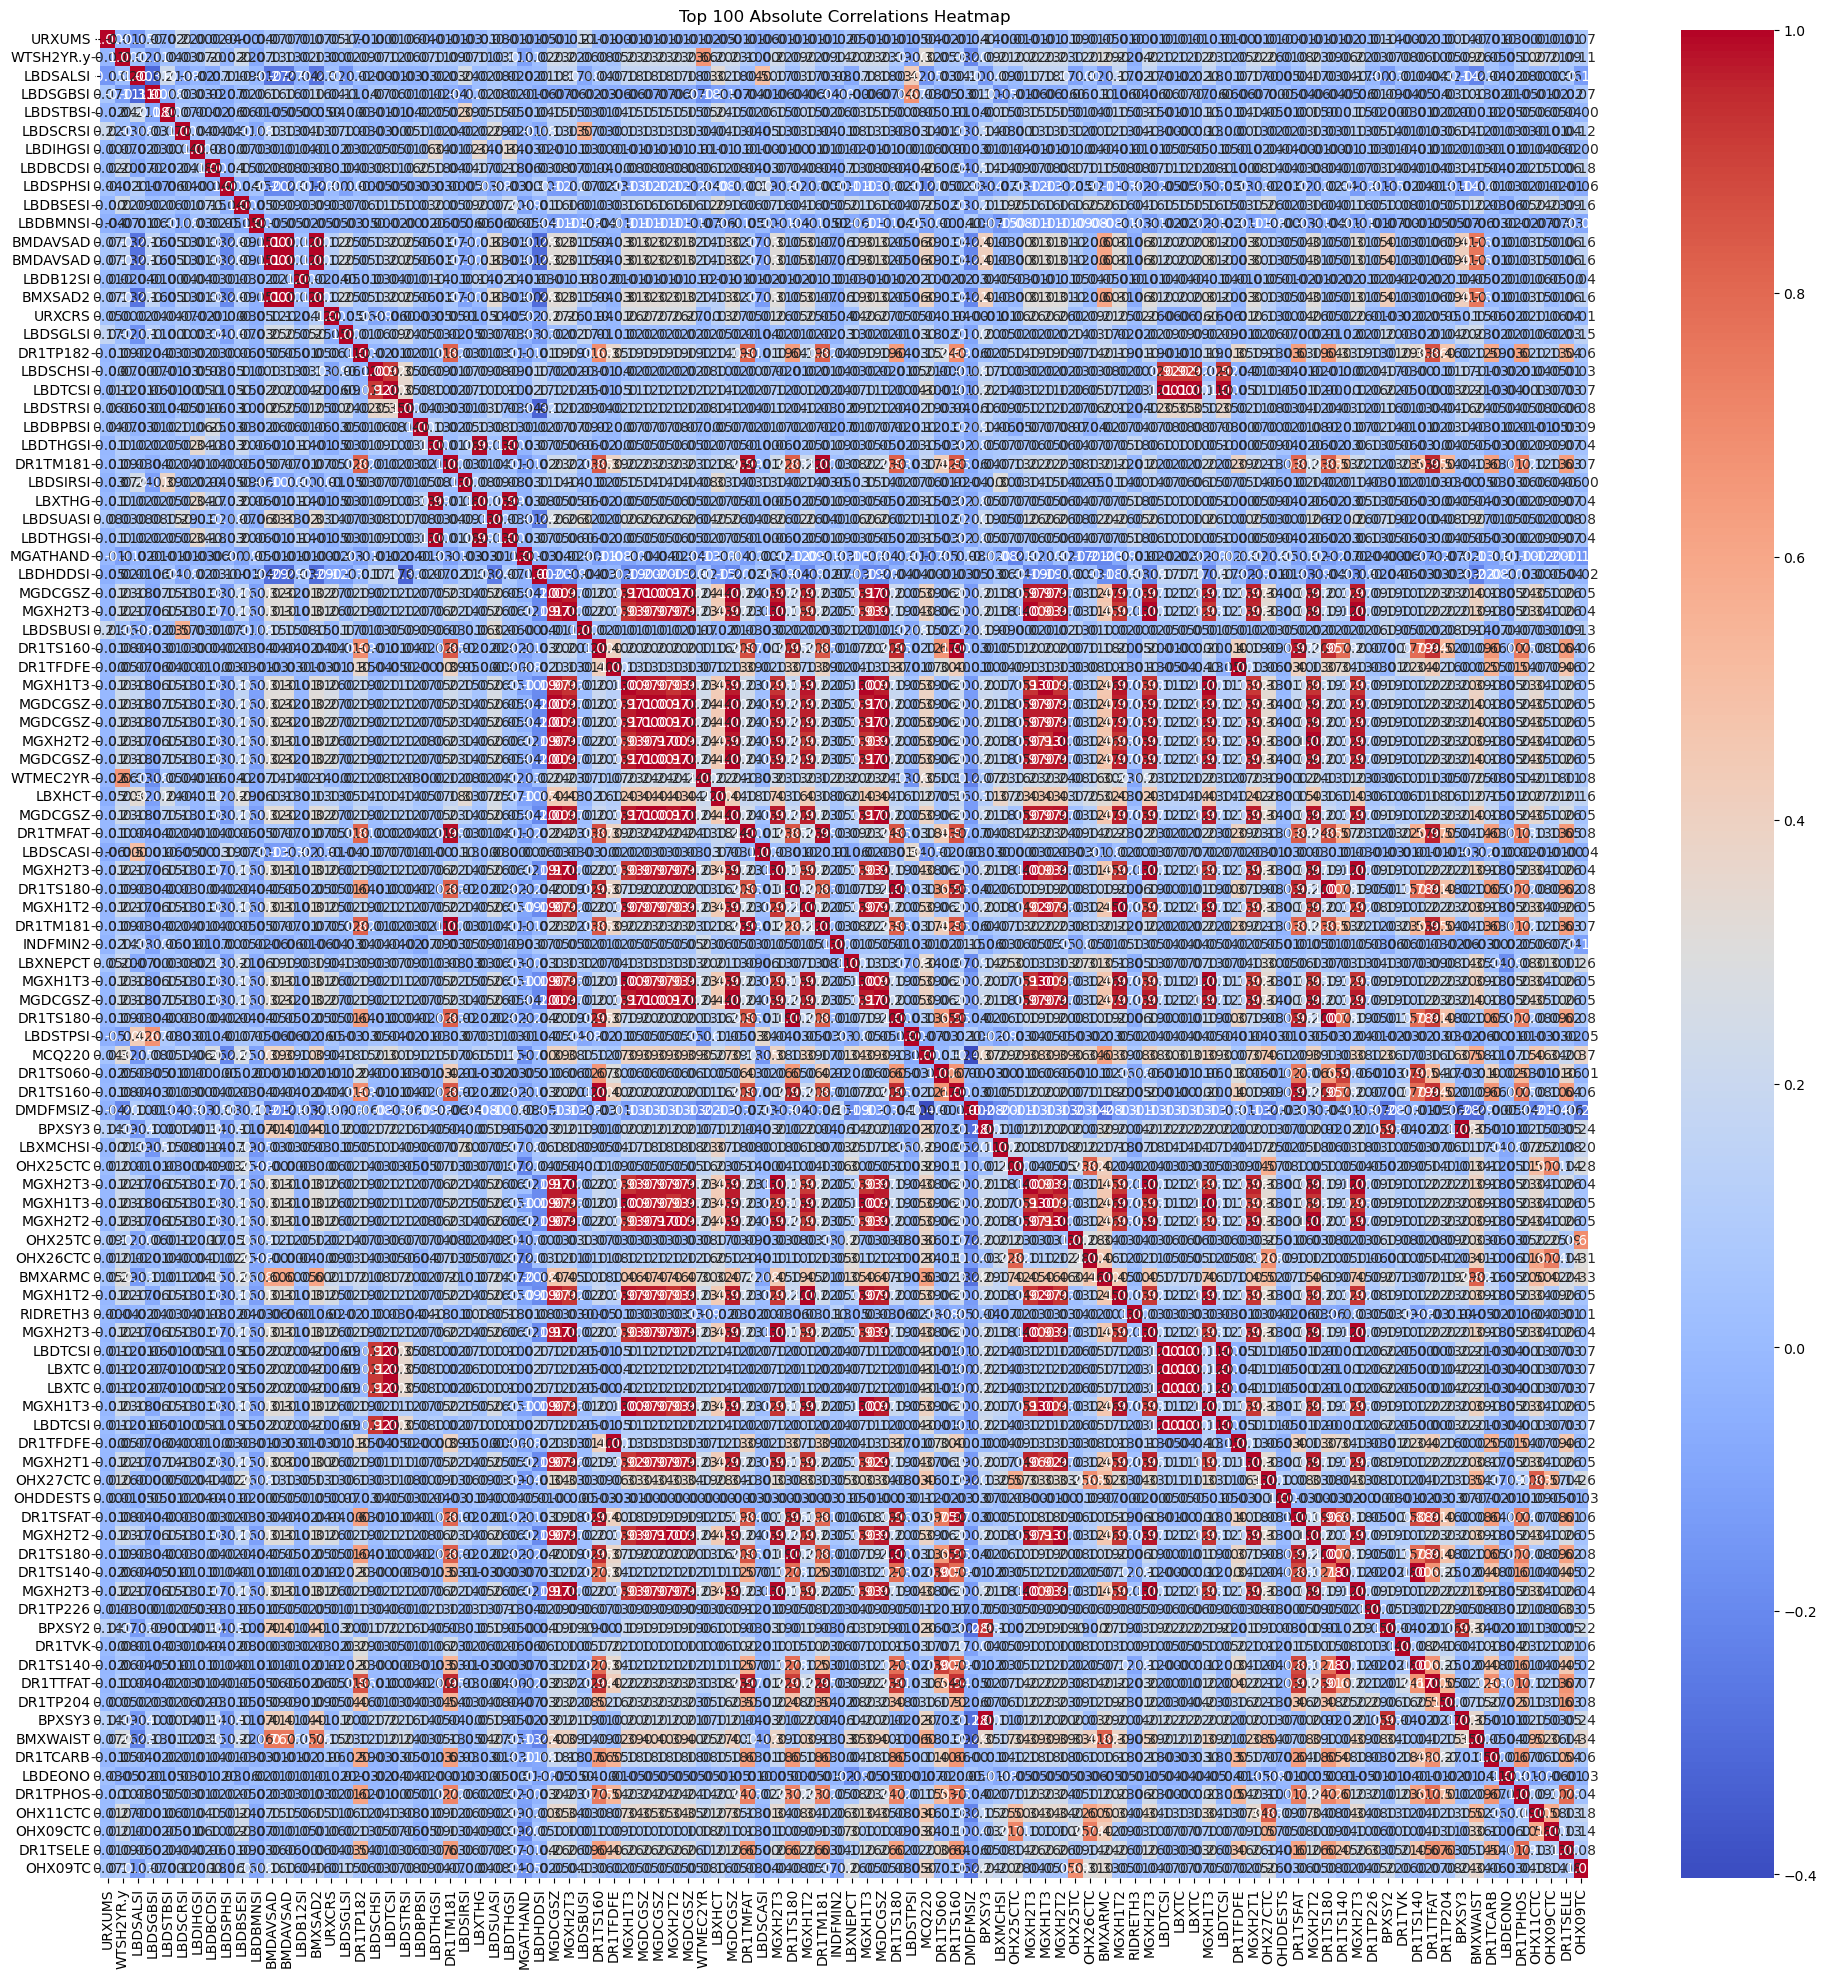

<Axes: title={'center': 'Top 100 Absolute Correlations Heatmap'}>

In [5]:
filtered_dataframe = filter_dataframe(df1, top_correlations)
create_heatmap(filtered_dataframe)

## 3- Selecting feature from high correlation pairs

In [6]:
highly_correlated_attributes = get_highly_correlated_attributes(correlation_matrix, threshold=0.5)
len(highly_correlated_attributes)

208

## 4- extract dataset with high correlation columns

In [7]:
df_highly_correlation=filter_dataset_with_columns(df1,highly_correlated_attributes)
df_highly_correlation

C:\Users\FSG\projects\PDRM\notebooks\data_preprocessing\data_reduction\../../../scripts/data_preprocessing\data_reduction.py:43: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return df.loc[:, selected_attributes]


PEASCTM1  WTSH2YR.x   MGDCGSZ  LBDSIRSI   MGXH1T3  LBDSTRSI   OHX17TC  \
0      0.213986   0.105820  0.304910  0.096057  0.220472  0.020038  0.666667   
1      0.265035   0.152503  0.345607  0.133468  0.329396  0.039417  0.666667   
2      0.229720   0.359484  0.536176  0.168857  0.484252  0.005296  0.666667   
3      0.277972   0.173127  0.156331  0.133468  0.110236  0.015227  0.666667   
4      0.329021   0.105820  0.147933  0.155713  0.106299  0.011427  0.666667   
...         ...        ...       ...       ...       ...       ...       ...   
10170  0.210839   0.105820  0.401163  0.123357  0.366142  0.009432  0.666667   
10171  0.040559   0.051262  0.337855  0.133468  0.316273  0.015227  0.666667   
10172  0.234615   0.179965  0.249354  0.079879  0.262467  0.014405  0.000000   
10173  0.130420   0.082847  0.082687  0.133468  0.070866  0.015227  0.666667   
10174  0.171329   0.030116  0.180879  0.133468  0.150919  0.015227  0.666667   

         URDACT  LBDSCRSI  DMDHRBR4  ...  INDFMIN2  DMDHHSZE  DR1TS040  \
0      0.001202  0.053733       0.0  ...  0.214286  0.666667  0.040729   
1      0.033977  0.029206       0.0  ...  0.428571  0.000000  0.348150   
2      0.001147  0.054321       0.0  ...  0.642857  0.666667  0.066580   
3      0.002316  0.030957       0.0  ...  0.428571  0.000000  0.049284   
4      0.019252  0.025697       0.0  ...  1.000000  0.666667  0.003162   
...         ...       ...       ...  ...       ...       ...       ...   
10170  0.000426  0.047311       0.0  ...  0.428571  0.000000  0.272643   
10171  0.000841  0.030957       0.0  ...  0.500000  0.000000  0.127394   
10172  0.000547  0.030957       1.0  ...  0.428571  0.000000  0.086665   
10173  0.000558  0.030957       1.0  ...  0.357143  0.000000  0.063790   
10174  0.000493  0.030957       1.0  ...  1.000000  0.000000  0.093175   

       LBDSCASI  OHX24TC  DMDFMSIZ  OHX23CTC  LBDBGELC  DR1TATOA  OHX18CTC  
0      0.263889     0.75       0.4  0.363636       1.0  0.000000       0.3  
1      0.222222     0.25       0.6  0.636364       1.0  0.000000       0.0  
2      0.180556     0.25       0.2  1.000000       1.0  0.000000       1.0  
3      0.263889     0.25       0.6  0.636364       1.0  0.000000       0.7  
4      0.333333     0.75       0.2  1.000000       1.0  0.000000       0.0  
...         ...      ...       ...       ...       ...       ...       ...  
10170  0.333333     0.25       0.8  0.636364       1.0  0.000000       0.6  
10171  0.263889     0.00       0.6  0.000000       1.0  0.000000       0.7  
10172  0.263889     0.25       0.0  0.636364       0.0  0.000000       1.0  
10173  0.263889     0.25       0.6  0.636364       1.0  0.000000       0.7  
10174  0.263889     0.25       0.6  0.636364       1.0  0.012717       0.6  

[10175 rows x 208 columns]

## 5- save dataframe

In [9]:
save_files([df_highly_correlation], 'df_filling_missing_values_with_median_encoded_handle_noisy_normalized_highly_correlated.csv', base_path='../../../data/processed_data/')